In [10]:
import numpy as np
import pandas as pd
import sys
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.stats.multitest as multi
args = sys.argv

# FPKM
Fragments Per Kilobase of exon model per Million mapped fragments 即每千个碱基的转录每百万映射读取的fragments。
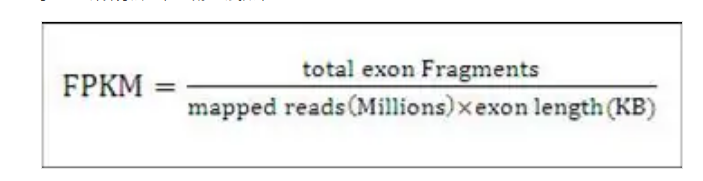

In [2]:
def get_id(x):
    return x.split('";')[1][10:]

In [ ]:
##format: gtf
hic_scaffold_1	StringTie	transcript	3733	5515	.	+	.	transcript_id "MSTRG.1.1"; gene_id "MSTRG.1"; xloc "XLOC_000001"; class_code "u"; tss_id "TS#S1";
hic_scaffold_1	StringTie	exon	3733	4684	.	+	.	transcript_id "MSTRG.1.1"; gene_id "MSTRG.1"; exon_number "1";
hic_scaffold_1	StringTie	exon	4712	5515	.	+	.	transcript_id "MSTRG.1.1"; gene_id "MSTRG.1"; exon_number "2";
hic_scaffold_1	EVM	transcript	309785	311029	.	+	.	transcript_id "PH02Gene41921.t1"; gene_id "PH02Gene41921"; gene_name "PH02Gene41921"; xloc "XLOC_000002"; ref_gene_id "PH02Gene41921"; cmp_ref "PH02Gene41921.t1"; class_code "="; tss_id "TSS2";
hic_scaffold_1	EVM	exon	309785	310858	.	+	.	transcript_id "PH02Gene41921.t1"; gene_id "PH02Gene41921"; exon_number "1";
hic_scaffold_1	EVM	exon	311021	311029	.	+	.	transcript_id "PH02Gene41921.t1"; gene_id "PH02Gene41921"; exon_number "2";
hic_scaffold_1	.	transcript	323103	326509	.	+	.	transcript_id "PH02Gene41923.t1"; gene_id "PH02Gene41923"; gene_name "PH02Gene41923"; xloc "XLOC_000003"; ref_gene_id "PH02Gene41923"; cmp_ref "PH02Gene41923.t1"; class_code "="; tss_id "TSS3";
hic_scaffold_1	.	exon	323103	323105	.	+	.	transcript_id "PH02Gene41923.t1"; gene_id "PH02Gene41923"; exon_number "1";
hic_scaffold_1	.	exon	324606	326509	.	+	.	transcript_id "PH02Gene41923.t1"; gene_id "PH02Gene41923"; exon_number "2";

In [ ]:
df = pd.read_csv("../compare_merge.annotated.gtf", sep= '\t', comment="#",usecols=[2,3,4,8],
                names=['ty', 'st', 'en', 'mix'])

df=df[df['ty'] == 'exon'] # 只要外显子
df['length'] = df['en'] - df['st']+1 #计算外显子的长度
df['ID'] = df['mix'].apply(get_id) # 取出ID
final = df.groupby("ID")[['length']].sum() # 根据ID求出 外显子的总长
final.to_csv("Bamboo_gene_exon_length.txt", sep = '\t') # 输出外显子

In [ ]:
reads = pd.read_csv("Flower_1.txt",sep = '\t', names=['ID', 'count'])[:-5]
exon_long = pd.read_csv("Bamboo_gene_exon_length.txt", sep = '\t')
merge_df = pd.merge(reads, exon_long,on = 'ID')
merge_df['FPKM'] = 1e9*merge_df['count']/merge_df['length']/merge_df['count'].sum()
merge_df.to_csv("Flower_1_FPKM.txt", sep = '\t')

In [3]:
exon_long = pd.read_csv("Bamboo_gene_exon_length.txt", sep = '\t') #读入 外显子长度
gene_matrix = pd.DataFrame(index=exon_long['ID'])

for na in ['Flower_1', "Flower_2", 'WT_1', 'WT_2']:
    reads = pd.read_csv(na + ".txt",sep = '\t', names=['ID', 'count'])[:-5]
    merge_df = pd.merge(reads, exon_long,on = 'ID')
    merge_df['FPKM'] = round(1e9*merge_df['count']/merge_df['length']/merge_df['count'].sum(),3)
    merge_df.to_csv(na + "_FPKM.txt", sep = '\t')
    gene_matrix[na] = merge_df.set_index('ID')['FPKM']
gene_matrix.to_csv("gene_matrix.txt",sep = '\t')

In [4]:
gene_matrix

,Flower_1,Flower_2,WT_1,WT_2
ID,,,,
MSTRG.1,0.000,0.000,0.000,0.000
MSTRG.10000,3.410,3.370,3.372,4.601
MSTRG.10001,20.818,24.746,15.558,17.619
MSTRG.10002,10.396,14.451,11.765,15.242
MSTRG.10003,2.129,2.316,1.690,1.617
...,...,...,...,...
PH02Gene51516,0.204,0.000,0.000,0.000
PH02Gene51518,0.000,0.000,0.000,0.000
PH02Gene51520,0.000,0.000,0.000,0.000


In [5]:
gene_matrix = gene_matrix[gene_matrix.sum(axis=1)!=0]

(0.0, 15.0)

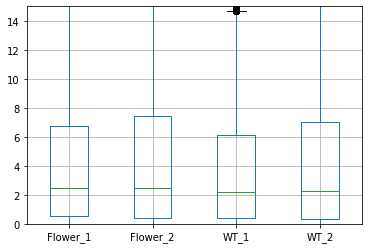

In [6]:
gene_matrix.boxplot()
plt.ylim(0,15)

In [7]:
test = gene_matrix[ gene_matrix.mean(axis =1)>1 ]**.5

/home/granddesign/sys_tools/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/granddesign/sys_tools/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/granddesign/sys_tools/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either 

(-5.0, 13.0)

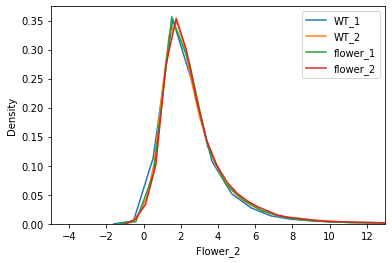

In [8]:
sns.distplot(test['WT_1'], hist=False, label='WT_1')
sns.distplot(test['WT_2'], hist=False, label='WT_2')
sns.distplot(test['Flower_1'], hist=False, label='flower_1')
sns.distplot(test['Flower_2'], hist=False, label='flower_2')
plt.legend()
plt.xlim(-5,13)

## P value Q value(FDR)
p-value：衡量一次检验假阳性率的指标（False positive rate） ；
q value：衡量错误发现率的指标（False discovery rate，简称FDR，所有检验中假阳性的概率

In [9]:
def fdr(p_vals):

    ranked_p_values = stats.rankdata(p_vals)
    fdr = p_vals * len(p_vals) / ranked_p_values
    fdr[fdr > 1] = 1

    return fdr

In [11]:
statistic, pvalue = stats.ttest_ind(gene_matrix[['Flower_1', 'Flower_2']], gene_matrix[['WT_1', 'WT_2']],axis =1)

In [12]:
gene_matrix['WT'] = gene_matrix[['WT_1', 'WT_2']].mean(axis =1)
gene_matrix['Flower'] = gene_matrix[['Flower_1', 'Flower_2']].mean(axis =1)
gene_matrix['Flower/WT'] = np.log2(gene_matrix['Flower']/gene_matrix['WT'])

<ipython-input-12-bd1bb4d6b6a7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gene_matrix['WT'] = gene_matrix[['WT_1', 'WT_2']].mean(axis =1)
<ipython-input-12-bd1bb4d6b6a7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gene_matrix['Flower'] = gene_matrix[['Flower_1', 'Flower_2']].mean(axis =1)
/home/granddesign/sys_tools/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
<ipython-inpu

In [13]:
reject, pvalue_corr = multi.fdrcorrection(pvalue)

In [14]:
gene_matrix["Flower/WT_pvalue"] = pvalue
gene_matrix["Flower/WT_qvalue"] = pvalue_corr

<ipython-input-14-00b6761ea487>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gene_matrix["Flower/WT_pvalue"] = pvalue
<ipython-input-14-00b6761ea487>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gene_matrix["Flower/WT_qvalue"] = pvalue_corr


In [15]:
gene_matrix[ (gene_matrix['Flower/WT_pvalue'] < 0.05) & (gene_matrix['Flower/WT_qvalue'] < 0.1) ]

,Flower_1,Flower_2,WT_1,WT_2,WT,Flower,Flower/WT,Flower/WT_pvalue,Flower/WT_qvalue
ID,,,,,,,,,
MSTRG.10450,6.155,6.141,7.973,7.979,7.9760,6.1480,-0.375548,0.000017,0.085294
MSTRG.13253,4.595,4.566,0.609,0.636,0.6225,4.5805,2.879359,0.000025,0.091501
MSTRG.14746,1.070,1.187,31.359,31.636,31.4975,1.1285,-4.802759,0.000025,0.091501
MSTRG.14811,12.878,12.933,3.023,3.006,3.0145,12.9055,2.097995,0.000008,0.071976
MSTRG.17189,1.102,1.093,0.000,0.000,0.0000,1.0975,inf,0.000017,0.085294
MSTRG.18783,1.627,1.611,0.155,0.160,0.1575,1.6190,3.361679,0.000033,0.097221
MSTRG.23333,11.687,11.752,0.145,0.067,0.1060,11.7195,6.788703,0.000019,0.085294
MSTRG.26132,8.125,8.153,3.292,3.300,3.2960,8.1390,1.304135,0.000009,0.071976
MSTRG.26712,2.075,2.177,15.323,15.209,15.2660,2.1260,-2.844109,0.000034,0.097221


In [16]:
up_genes = [x for x in gene_matrix[ (gene_matrix['Flower/WT_pvalue'] < 0.05) & (gene_matrix["Flower/WT"]>=0.585)].index if x.startswith("PH")]
do_genes = [x for x in gene_matrix[ (gene_matrix['Flower/WT_pvalue'] < 0.05) & (gene_matrix["Flower/WT"]<=-0.585)].index if x.startswith("PH")]

In [17]:
len(up_genes)

650

In [18]:
len(do_genes)

860

In [19]:
pd.DataFrame(up_genes).to_csv("Flower_WT_up_genes.txt", index=False, header=False)

In [20]:
pd.DataFrame(do_genes).to_csv("Flower_WT_do_genes.txt", index=False, header=False)

## make GO
###  超几何分布
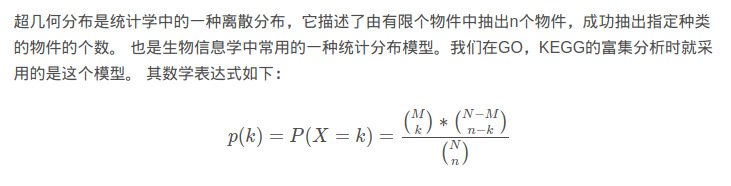
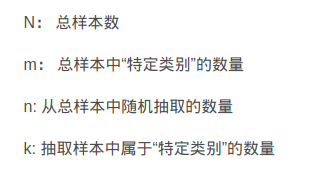

In [21]:
GOs = pd.read_csv("BP_Hic_annoation_1.txt", sep = '\t', names=['ID', 'GO', 'DES'])

In [31]:
genes = [x[:-1] for x in open("Flower_WT_up_genes.txt")]

In [32]:
zhuan_gene_go = GOs.set_index('ID').loc[np.intersect1d(genes, GOs['ID'])].reset_index()
zhuan_gene_go['num'] = 1
final_go = pd.DataFrame(zhuan_gene_go.loc[:,'GO'].value_counts())
final_go['go_all'] = GOs.loc[:,'GO'].value_counts().loc[final_go.index]
final_go['genes'] = len(genes)
final_go['back_genes'] = len(np.unique(GOs['ID']))

final_go = final_go[['GO', 'back_genes','genes', 'go_all' ]]
pvalues=stats.hypergeom.sf(final_go['GO'],final_go['back_genes' ],final_go['genes'],final_go[ 'go_all' ])
final_go['pvalues'] = pvalues
final_go.columns = ['GO_nums', 'back_genes', 'Go_genes', 'all_GO', 'pvalues']
final_go['DES'] = GOs.drop_duplicates("GO").set_index("GO").loc[final_go.index]['DES']

In [33]:
gene_list = []
for na in final_go.index:
    temp= ''
    for (a1,a2) in zhuan_gene_go[['ID', 'GO']].values:
        if a2 == na:
            temp+=a1 +" : "
    gene_list.append(temp)
    
final_go['genes'] = gene_list

In [34]:
r1, pvalue_c1 = multi.fdrcorrection(final_go['pvalues'])

In [35]:
final_go['qvalues'] = pvalue_c1

In [36]:
final_pvalues = final_go[ (final_go['pvalues'] < 0.05) ]

In [40]:
final_pvalues[final_pvalues['GO_nums']>2]

,GO_nums,back_genes,Go_genes,all_GO,pvalues,DES,genes,qvalues
GO:0009451,26,30678,650,829,0.019115,"RNA modification,other metabolic processes",PH02Gene00322 : PH02Gene00917 : PH02Gene02690 ...,0.095864
GO:0090305,25,30678,650,865,0.048469,"nucleic acid phosphodiester bond hydrolysis,ot...",PH02Gene00322 : PH02Gene00917 : PH02Gene02690 ...,0.148683
GO:0009733,6,30678,650,151,0.042354,"response to auxin,response to chemical",PH02Gene12702 : PH02Gene13461 : PH02Gene35455 ...,0.142057
GO:0046274,4,30678,650,60,0.008807,"lignin catabolic process,secondary metabolic p...",PH02Gene01024 : PH02Gene33832 : PH02Gene40832 ...,0.073402
GO:0048653,3,30678,650,23,0.001283,"anther development,anatomical structure develo...",PH02Gene19196 : PH02Gene50934 : PH02Gene51154 :,0.031346
GO:0006284,3,30678,650,43,0.012822,"base-excision repair,DNA metabolic process",PH02Gene03237 : PH02Gene05376 : PH02Gene06648 :,0.078592
GO:0009690,3,30678,650,29,0.003113,"cytokinin metabolic process,other metabolic pr...",PH02Gene14913 : PH02Gene23111 : PH02Gene43811 :,0.051522
GO:0000724,3,30678,650,57,0.032617,double-strand break repair via homologous reco...,PH02Gene03237 : PH02Gene44872 : PH02Gene49369 :,0.127014
GO:0070413,3,30678,650,39,0.009130,"trehalose metabolism in response to stress,car...",PH02Gene04530 : PH02Gene28482 : PH02Gene35385 :,0.073402
GO:0010143,3,30678,650,42,0.011823,"cutin biosynthetic process,biosynthetic process",PH02Gene16754 : PH02Gene19196 : PH02Gene44403 :,0.073835


# 差异表达的软件：DESeq2
# GO的分析软件：clusterprofiler cytoscape